In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
#read the data
df = pd.read_csv("/content/drive/My Drive/datsets_datascience/cancer_dataset/cancer_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#split and store all features except diagnosis(i.e. the target class)
x = df.drop(['diagnosis'],axis=1)
x = x.iloc[:,:-1]
x = x.iloc[:,1:31]
# temp = pd.get_dummies(x,dummy_na=True)
# temp
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y = df['diagnosis']
y = y.replace(to_replace ="B",value=0)#"B_Type is replaced by value 0"
y = y.replace(to_replace ="M",value=1)#"M_type is replaced by value 1"
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [9]:
print('number of 1-->',len(y[y==1]))
print("number of 0-->",len(y[y==0]))

number of 1--> 212
number of 0--> 357


In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_scoreDT =[]
dt_res = []
rd_res = []
i=1
for train_index,test_index in Skf.split(x,y):
  print('{} of KFold {}'.format(i,Skf.n_splits))
  x_tr,x_te = x.iloc[train_index], x.iloc[test_index]
  y_tr,y_te = y.iloc[train_index], y.iloc[test_index]
#Training and Fitting a decision tree
  dt_clf = DecisionTreeClassifier(min_samples_split=10,
                                  random_state=45)
  dt_clf.fit(x_tr, y_tr)
  #performing cross validation for 10-folds
  scores = f1_score(y_te, dt_clf.predict(x_te))
  print('DT F1:',scores)
  dt_res.append(scores)
  
  #random forest
  rd_clf = RandomForestClassifier(oob_score = False, random_state=22, n_estimators= 100)
  rd_clf.fit(x_tr, y_tr)
  pred_clf = rd_clf.predict(x_te)
  rd_scores = f1_score(Y_test, dt_clf.predict(X_test))
  print('random forest F1:',rd_scores)
  rd_res.append(rd_scores)
  i += 1
  

1 of KFold 10
DT F1: 0.9166666666666666
random forest F1: 1.0
2 of KFold 10
DT F1: 0.9523809523809523
random forest F1: 1.0
3 of KFold 10
DT F1: 0.9523809523809523
random forest F1: 0.975609756097561
4 of KFold 10
DT F1: 0.9523809523809523
random forest F1: 1.0
5 of KFold 10
DT F1: 0.8372093023255814
random forest F1: 1.0
6 of KFold 10
DT F1: 0.8947368421052632
random forest F1: 1.0
7 of KFold 10
DT F1: 0.8780487804878048
random forest F1: 0.9500000000000001
8 of KFold 10
DT F1: 0.888888888888889
random forest F1: 0.9545454545454545
9 of KFold 10
DT F1: 0.9545454545454545
random forest F1: 1.0
10 of KFold 10
DT F1: 0.8372093023255814
random forest F1: 1.0


In [49]:
print('baseline dt-->',np.mean(dt_res))
print('baseline rd-->',np.mean(rd_res))

baseline dt--> 0.9064448094488098
baseline rd--> 0.9880155210643015


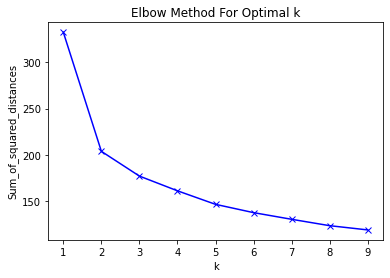

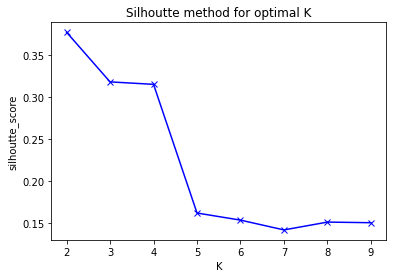

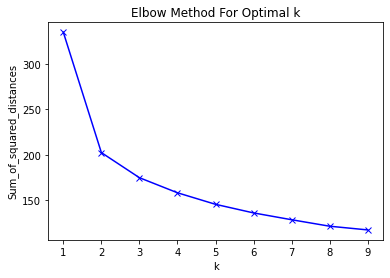

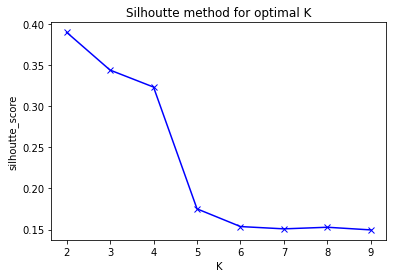

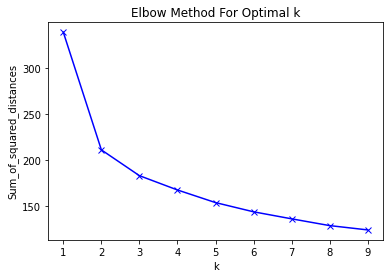

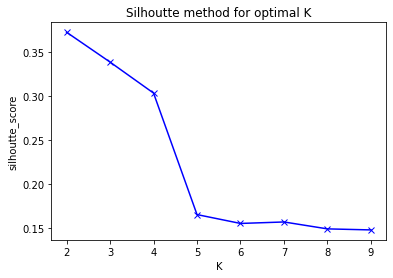

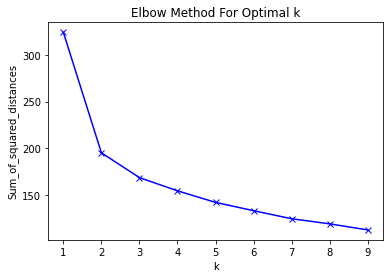

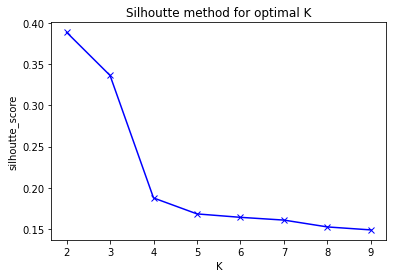

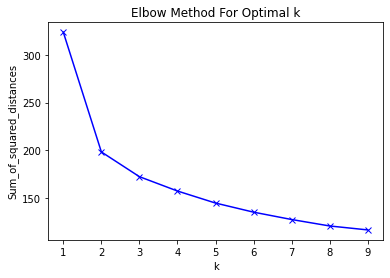

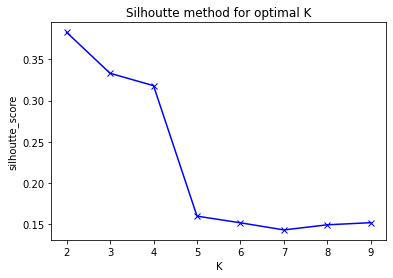

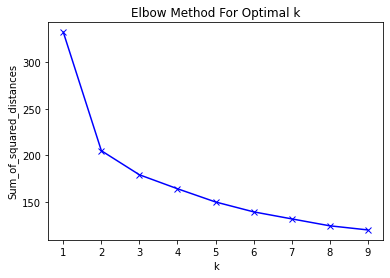

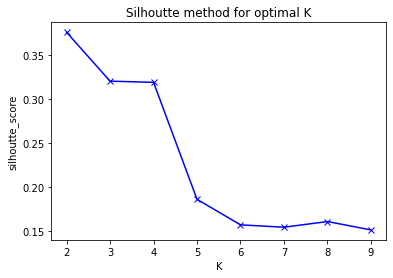

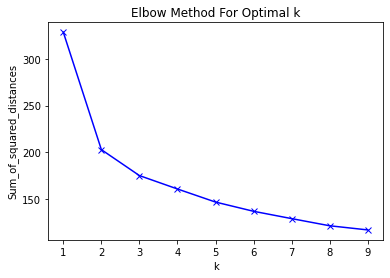

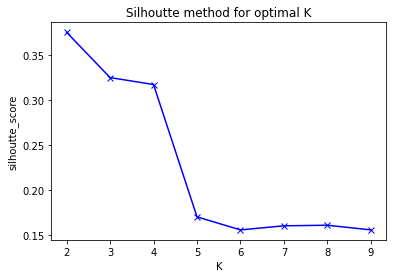

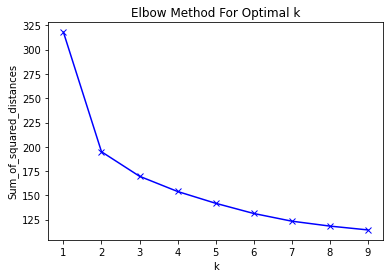

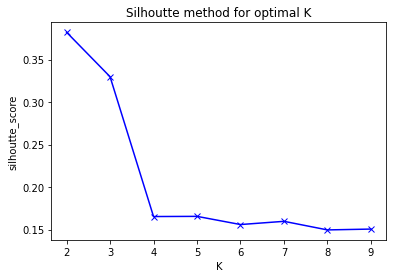

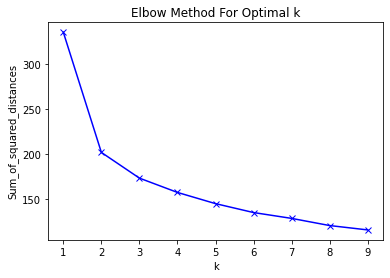

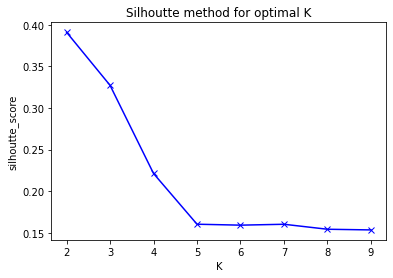

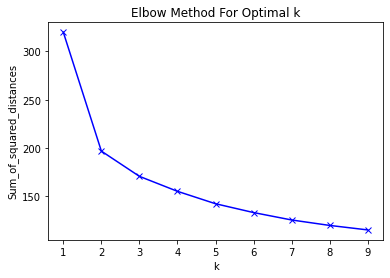

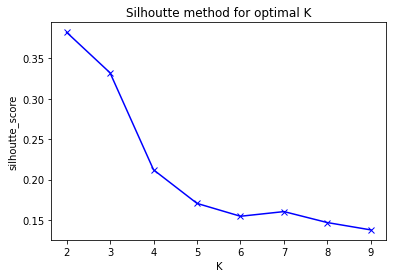

In [50]:


data_trans = 0
True_label = 0
skf = StratifiedKFold(n_splits=10)
# summerising the distributions after split into 10 bins
for train_index,test_index in skf.split(x,y):     #main for loop
    #print("TRAIN:", train_index, "TEST:", test_index)
  X_train,X_test = x.iloc[train_index], x.iloc[test_index]
  Y_train,Y_test = y.iloc[train_index], y.iloc[test_index]

  mms = MinMaxScaler()
  data_transformed= mms.fit_transform(X_train)
  data_transformed_test = mms.fit_transform(X_test)
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    squared_Sum = Sum_of_squared_distances.append(km.inertia_)

#silhoutte method
  sil = []
  K_sil = range(2,10)

  for Ks in K_sil:
    kmeans = KMeans(n_clusters = Ks)
    kmeans = kmeans.fit(data_transformed)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_transformed,labels,metric = 'euclidean'))

  #graph for elbow method
  plt.figure()
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

  #graph for silhoutte
  plt.figure()
  plt.plot(K_sil,sil,'bx-')
  plt.xlabel('K')
  plt.ylabel('silhoutte_score')
  plt.title('Silhoutte method for optimal K')
  plt.show()

In [88]:
k = 2
#elbow for identified number of clusters
km = KMeans(n_clusters = k)
km = km.fit(data_transformed)
squared_Sum = Sum_of_squared_distances.append(km.inertia_)

cluster_mem={}
for l in range(k):
  cluster_mem[l]=np.array([])
for clusters,features,true_label in zip(km.labels_,data_transformed,Y_train):
  print(features,"cluster = ",clusters, "labels=",true_label)
  print('-----------------------------------------------------')
#   for m in range(k):
#         if(cluster==m):
#           cluster_mem[m] = np.append(cluster_mem[m],features)
#           cluster_mem[m+1] = np.append(cluster_mem[m+1] ,true_label)
# clus_Train_arr ={}
# clus_Label_arr ={}
# for g in range(len(cluster_mem)//2):
#   clus_Train_arr[g] = np.array(cluster_mem[g])
#   clus_Label_arr[g] = cluster_mem[(g)+1]
#   clus_Train_arr[g] = np.reshape(clus_Train_arr[g],(-1,30)) 
          

[0.52103744 0.0226581  0.54598853 0.36373277 0.55396967 0.7920373
 0.70313964 0.73111332 0.66844634 0.60551811 0.35614702 0.12046941
 0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
 0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
 0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396] cluster =  0 labels= 1
-----------------------------------------------------
[0.64314449 0.27257355 0.61578329 0.50159067 0.22033898 0.18176799
 0.20360825 0.34875746 0.34436733 0.14132266 0.15643672 0.08258929
 0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
 0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
 0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813] cluster =  0 labels= 1
-----------------------------------------------------
[0.60149557 0.3902604  0.59574321 0.44941676 0.46674596 0.4310165
 0.46251172 0.63568588 0.48158035 0.21124684 0.22962158 0.09430251
 0.18037035 0.16292179 0.15083115 0.283954

In [0]:
#storing cluster number and respective centroids with number of samples
  temp_0 = np.array([]) # cluster 0 with minority class
  temp_1 = np.array([])# cluster 1 with minority class
  count_0 = 0
  count_1 = 0
  num_samples_0 = []
  num_samples_1 = []
  for cluster,centroid,labels in zip(km.labels_,data_transformed,Y_train):
      if(cluster==0 and labels == 1):
          count_0 = count_0 + 1
          temp_0 = np.append(temp_0 ,[centroid,"cluster",cluster,'labels',labels])
          np.append(num_samples_0,count_0)
      elif(cluster==1 and labels == 1):
          count_1 = count_1 + 1
          temp_1 = np.append(temp_1 ,[centroid,"cluster",cluster,'labels',labels])
          np.append(num_samples_1,count_1)


In [0]:

 #getting each cluster as a whole to train random forest for each cluster data
  temp_2 = np.array([])
  temp_3 = np.array([])
  temp_4 = np.array([])
  temp_5 = np.array([])
  for cluster,centroid,labels in zip(km.labels_,data_transformed,Y_train):
      if(cluster==0):
          temp_2 = np.append(temp_2 ,centroid)#centrid of cluster 1
          temp_3 = np.append(temp_3,labels)#labells of cluster 1
      elif(cluster==1):
              temp_4 = np.append(temp_4 ,centroid)#centroid of cluster 2
              temp_5 = np.append(temp_5,labels)#label of cluster 2

In [91]:
#centroid of cluster-1 
print("temp_0-->",temp_0)


temp_0--> [array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.55396967,
       0.7920373 , 0.70313964, 0.73111332, 0.66844634, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396])
 'cluster' 0 'labels' 1
 array([0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.22033898,
       0.18176799, 0.20360825, 0.34875746, 0.34436733, 0.14132266,
       0.15643672, 0.08258929, 0.12444047, 0.12565979, 0.11938675,
       0.08132304, 0.0469697 , 0.25383595, 0.08453875, 0.0911101 ,
       0.60690146, 0.30357143, 0.53981772, 0.43521431, 0.34755332,
       0.15456336, 0.19297125, 0.63917526, 0.23358959, 0.22287813])
 'cluster' 0 'labels' 1
 array([0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.46674596,
       0.4310165 , 0.46251172, 0.63568588, 0.48158035, 0.21124684,

In [92]:
#centroid of cluster-2
print("temp_1-->",temp_1)

temp_1--> [array([0.42780065, 0.45755834, 0.40709004, 0.27753977, 0.1937754 ,
       0.1451138 , 0.07729616, 0.16515905, 0.19273892, 0.14764111,
       0.09704871, 0.18272631, 0.08052584, 0.06295877, 0.07872999,
       0.05270075, 0.02780303, 0.14379617, 0.09452918, 0.07418156,
       0.40056919, 0.5826226 , 0.36550625, 0.23712151, 0.30991217,
       0.1240019 , 0.11653355, 0.34278351, 0.27261975, 0.19336219])
 'cluster' 1 'labels' 1
 array([0.41975484, 0.48156916, 0.41400041, 0.27113468, 0.21310338,
       0.2478989 , 0.23284911, 0.2666004 , 0.36305392, 0.07203033,
       0.10566721, 0.15863685, 0.10111671, 0.05561844, 0.27385525,
       0.21786283, 0.12755051, 0.37734419, 0.30854956, 0.07279964,
       0.31696905, 0.41684435, 0.30673838, 0.16990267, 0.27689361,
       0.16019055, 0.18546326, 0.38453608, 0.24521979, 0.05135773])
 'cluster' 1 'labels' 1
 array([0.36438071, 0.35238417, 0.35208348, 0.22948038, 0.35841015,
       0.16140114, 0.17326617, 0.26138171, 0.22370529, 0.19502949,

In [93]:
#cluster 1
clust1_train = temp_2
clust1_label = temp_3

clust1_train = np.reshape(clust1_train,(-1,30)) # cluster 1
print(clust1_train)
print(clust1_train.shape)
#cluster 2
clust2_train = temp_4
clust2_label = temp_5

clust2_train = np.reshape(clust2_train,(-1,30)) # cluster 2
print(clust2_train)
print(clust2_train.shape)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.43868617 0.33141698 0.45615369 ... 0.60996564 0.3455549  0.23822642]
 [0.25883856 0.22658099 0.26991915 ... 0.46116838 0.32840528 0.31719795]
 [0.5896635  0.30808252 0.5826135  ... 0.70790378 0.33530455 0.22989637]]
(171, 30)
[[0.42780065 0.45755834 0.40709004 ... 0.34278351 0.27261975 0.19336219]
 [0.41975484 0.48156916 0.41400041 ... 0.38453608 0.24521979 0.05135773]
 [0.36438071 0.35238417 0.35208348 ... 0.55292096 0.28858664 0.17788272]
 ...
 [0.20251787 0.34223876 0.19010435 ... 0.09731959 0.19554504 0.13833137]
 [0.31847224 0.30334799 0.31055214 ... 0.44123711 0.25310467 0.23133937]
 [0.13564296 0.20189381 0.13274826 ... 0.2243299  0.18470333 0.24301456]]
(342, 30)


In [94]:
#Training random forest model for each clusters-elbow method
#cluster 1
rd_clf_1 = RandomForestClassifier(random_state=22, n_estimators= 100)
rd_clf_1.fit(clust1_train, clust1_label)

#cluster 2
rd_clf_2 = RandomForestClassifier(random_state=22, n_estimators= 100)
rd_clf_2.fit(clust2_train, clust2_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)

In [95]:
from sklearn.metrics import f1_score
predict_1 = rd_clf_1.predict(data_transformed_test)
score_1 = f1_score(Y_test, predict_1)
print(predict_1)
print('score_clf1-->',score_1)
predict_2 = rd_clf_2.predict(data_transformed_test)
score_2 = f1_score(Y_test, predict_2)
print(predict_2)
print('score_clf2-->',score_2)
result_f1 = [score_1,score_2]
result_f1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0.]
score_clf1--> 0.7499999999999999
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0.]
score_clf2--> 0.8936170212765957


[0.7499999999999999, 0.8936170212765957]

In [96]:
cluster_test = km.predict(data_transformed_test)
print(cluster_test)
res_clus_test = f1_score(Y_test,cluster_test)
res_clus_test

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1]


0.0

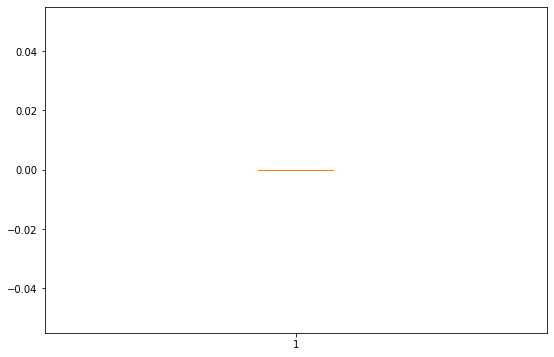

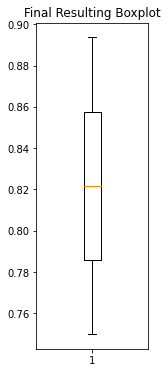

[0.7499999999999999, 0.8936170212765957]
0.8218085106382977
average: 0.8218085106382977
std deviation: 0.0718085106382979


In [98]:
# Create the boxplot
plt.figure(figsize=(9, 6))
plt.boxplot(res_clus_test)
plt.show()

# Create the boxplot
plt.figure(figsize=(2, 6))
plt.title('Final Resulting Boxplot')
plt.boxplot(result_f1)
plt.show()
print(result_f1)
print(np.mean(result_f1))
print('average:',np.mean(result_f1))
print('std deviation:',np.std(result_f1))